# Use OSMnx to get street networks by place name

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  
Once you've perused the features demo and overview notebooks, this notebook provides further demonstration of querying by place name with OSMnx.

In [1]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.5.1'

OSMnx lets you download street network data and build topologically corrected multidigraphs, project to UTM and plot the networks, and save the street network as SVGs, GraphML files, or GeoPackages for later use. The street networks are directed and preserve one-way directionality. API responses can be cached locally so OSMnx doesn't have to request the same data from the API multiple times: saving bandwidth, increasing speed, and enabling reproducibility.

You can download a street network by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance (either distance along the network, or cardinal)
  - an address plus a distance (either distance along the network, or cardinal)
  - a place name or list of place names (for OSMnx to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries

You can also specify several different built-in network types:
  - `drive` - get drivable public streets (but not service roads)
  - `drive_service` - get drivable streets, including service roads
  - `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - `bike` - get all streets and paths that cyclists can use
  - `all` - download all non-private OSM streets and paths
  - `all_private` - download all OSM streets and paths, including private-access ones

Or you can define your own fine-tuned network type using OSMnx's `custom_filter` parameter (to get just highways, or railways, canals, etc).

## 1. Query/download place boundaries

The `graph_from_place` function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks. You can download by cities, neighborhoods, boroughs, counties, states, or countries: anything with geocodable polygon boundaries in OSM's database. Notice the polygon geometries represent political boundaries, not physical/land boundaries. OSMnx will turn your geocoded place (or multiple places) boundaries into a geopandas GeoDataFrame.

OSMnx를 사용하면 거리 네트워크 데이터를 다운로드하고 위상적으로 수정된 다중 그래프를 구축하고 UTM으로 투영하고 네트워크를 플로팅하고 나중에 사용할 수 있도록 거리 네트워크를 SVG, GraphML 파일 또는 GeoPackage로 저장할 수 있습니다. 거리 네트워크는 단방향 방향성을 유지하고 지시합니다. API 응답은 로컬로 캐시될 수 있으므로 OSMnx는 API에서 동일한 데이터를 여러 번 요청할 필요가 없습니다. 즉, 대역폭 절약, 속도 증가 및 재현성 활성화가 가능합니다.

다음 중 하나를 OSMnx에 제공하여 거리 네트워크를 다운로드할 수 있습니다.
   - 경계 상자
   - 위도-경도에 거리를 더한 값(네트워크 상의 거리 또는 추기경)
   - 주소와 거리(네트워크상의 거리 또는 기수)
   - 장소 이름 또는 장소 이름 목록(OSMnx가 자동으로 지오코딩하고 경계를 가져오기 위해)
   - 원하는 거리 네트워크 경계의 폴리곤

다음과 같은 여러 가지 기본 제공 네트워크 유형을 지정할 수도 있습니다.
   - `drive` - 운전 가능한 공공 도로를 가져옵니다(서비스 도로는 아님).
   - `drive_service` - 서비스 도로를 포함하여 주행 가능한 거리를 가져옵니다.
   - 'walk' - 보행자가 사용할 수 있는 모든 거리와 경로를 가져옵니다(이 네트워크 유형은 일방통행성을 무시합니다).
   - `bike` - 자전거 타는 사람이 사용할 수 있는 모든 거리와 경로를 가져옵니다.
   - `all` - 비공개 OSM이 아닌 모든 거리 및 경로를 다운로드합니다.
   - `all_private` - 비공개 액세스를 포함하여 모든 OSM 거리 및 경로를 다운로드합니다.

또는 OSMnx의 `custom_filter` 매개변수를 사용하여 자신만의 미세 조정된 네트워크 유형을 정의할 수 있습니다(고속도로, 철도, 운하 등만 가져오기 위해).

## 1. 장소 경계 쿼리/다운로드

`graph_from_place` 함수는 장소 경계 지오코딩 논리를 사용하여 장소 경계 내에서 네트워크를 찾습니다. 거리 네트워크에 도달하기 전에 이 장소 경계 쿼리를 간단히 살펴보겠습니다. 도시, 이웃, 자치구, 카운티, 주 또는 국가별로 다운로드할 수 있습니다. OSM 데이터베이스에서 지오코딩 가능한 폴리곤 경계가 있는 모든 항목을 다운로드할 수 있습니다. 폴리곤 기하학은 물리적/육지 경계가 아니라 정치적 경계를 나타냅니다. OSMnx는 지오코딩된 장소(또는 여러 장소) 경계를 geopandas GeoDataFrame으로 변환합니다.

In [2]:
# neighborhoods or boroughs
gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")

# counties
gdf = ox.geocode_to_gdf("Cook County, Illinois, United States")

# states
gdf = ox.geocode_to_gdf("Iowa")

In [3]:
# you can also buffer the place boundaries (0.5 km in this example)
gdf = ox.geocode_to_gdf("Piedmont, California, USA", buffer_dist=500)

In [4]:
# you can get multiple places in a single query
gdf = ox.geocode_to_gdf(["United Kingdom", "Ireland"])

# or optionally buffer them
places = [
    "Berkeley, California, USA",
    "Oakland, California, USA",
    "Piedmont, California, USA",
    "Emeryville, California, USA",
    "Alameda, Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

The `geocode_to_gdf` function takes a `which_result` argument. Its default value `None` makes OSMnx retrieve the first result with geometry type Polygon/MultiPolygon (if one exists on OSM). Alternatively, pass an integer value as `which_result` to retrieve a specific geocoding result, regardless of its geometry type.

When querying, be specific and explicit, and sanity check the results. Try passing a dict instead of a string to be more explicit.

`geocode_to_gdf` 함수는 `which_result` 인수를 사용합니다. 기본값 'None'은 OSMnx가 다각형/다중 다각형(OSM에 존재하는 경우) 도형 유형의 첫 번째 결과를 검색하도록 합니다. 또는 지오메트리 유형에 관계없이 특정 지오코딩 결과를 검색하려면 정수 값을 `which_result`로 전달하세요.

쿼리할 때 구체적이고 명시적으로 작성하고 결과를 온전하게 확인하십시오. 보다 명확하게 하려면 문자열 대신 dict를 전달해 보십시오.

In [5]:
# oops, this gets the county of alameda rather than the city!
alameda1 = ox.geocode_to_gdf("Alameda, California, USA")

# this gets the city of alameda
alameda2 = ox.geocode_to_gdf(
    {
        "city": "Alameda",
        "county": "Alameda County",
        "state": "California",
        "country": "USA",
    }
)

# the city is a very small part of the county
alameda1 = ox.project_gdf(alameda1)
alameda2 = ox.project_gdf(alameda2)
alameda2.area.iloc[0] / alameda1.area.iloc[0]

0.027920995058354003

OSM resolves 'Mexico' to Mexico City (as the first geocoding result) and returns a single point at the center of the city. If we want the boundaries of the country of Mexico, we can 1) specify which_result=None to find the first polygon and hope it's the country, or 2) pass a dict containing a structured query to specify that we want Mexico the country instead of Mexico the city.

OSM은 첫 번째 지오코딩 결과로 '멕시코'를 멕시코시티로 해석하고 도시 중심의 단일 지점을 반환합니다. 멕시코 국가의 경계를 원하는 경우 1) which_result=None을 지정하여 첫 번째 다각형을 찾고 그것이 국가이길 바라거나 2) 구조화된 쿼리가 포함된 사전을 전달하여 대신 멕시코를 국가로 지정하도록 지정할 수 있습니다. 도시 멕시코.

In [6]:
mexico = ox.geocode_to_gdf("Mexico", which_result=2)
type(mexico["geometry"].iloc[0])

shapely.geometry.polygon.Polygon

In [7]:
# let the geocoder find the first Polygon/MultiPolygon result
mexico = ox.geocode_to_gdf("Mexico", which_result=None)
type(mexico["geometry"].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

In [8]:
# instead of a string, you can pass a dict containing a structured query for better precision
mexico = ox.geocode_to_gdf({"country": "Mexico"})
type(mexico["geometry"].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

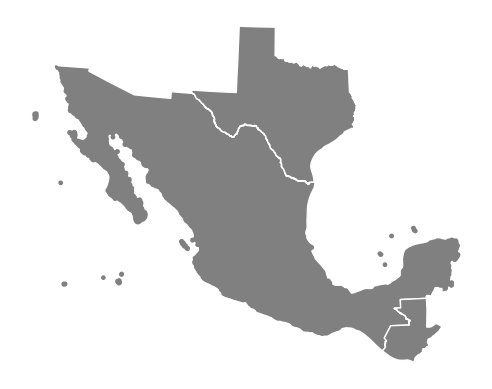

In [9]:
# you can pass multiple queries with mixed types (dicts and strings)
mx_gt_tx = ox.geocode_to_gdf([{"country": "Mexico"}, "Guatemala", {"state": "Texas"}])
mx_gt_tx = ox.project_gdf(mx_gt_tx)
ax = mx_gt_tx.plot(fc="gray", ec="w")
_ = ax.axis("off")

If you query 'France', OSM returns the country with all its overseas territories as result 1 and Metropolitan France alone as later down the results. Passing `which_result` can help you specifically retrieve the desired geocoding result, or you can query the geospatial feature you want by its OSM ID.

'France'를 쿼리하면 OSM은 결과 1로 모든 해외 영토가 포함된 국가를 반환하고 나중에 결과 아래로 프랑스 대도시만을 반환합니다. `which_result`를 전달하면 원하는 지오코딩 결과를 구체적으로 검색하는 데 도움이 되거나 OSM ID로 원하는 지형 공간 기능을 쿼리할 수 있습니다.

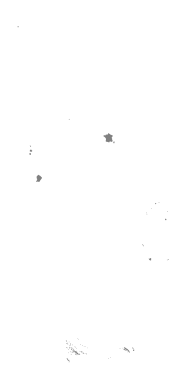

In [10]:
france = ox.geocode_to_gdf("France")
france = ox.project_gdf(france)
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

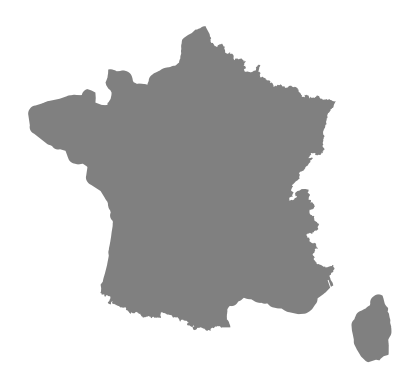

In [11]:
france = ox.project_gdf(ox.geocode_to_gdf("R1403916", by_osmid=True))
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

Finally, note that you can also query by OSM ID rather than place name by passing `by_osmid=True` to the function. See documentation for usage details.

## 2. Get street networks by place name

This "by place" querying logic works the same as the place boundary querying we just saw above.

In [12]:
# get the walking network for piedmont
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk")

In [13]:
# you can also get a network with a buffer distance (meters) around the place
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk", buffer_dist=200)

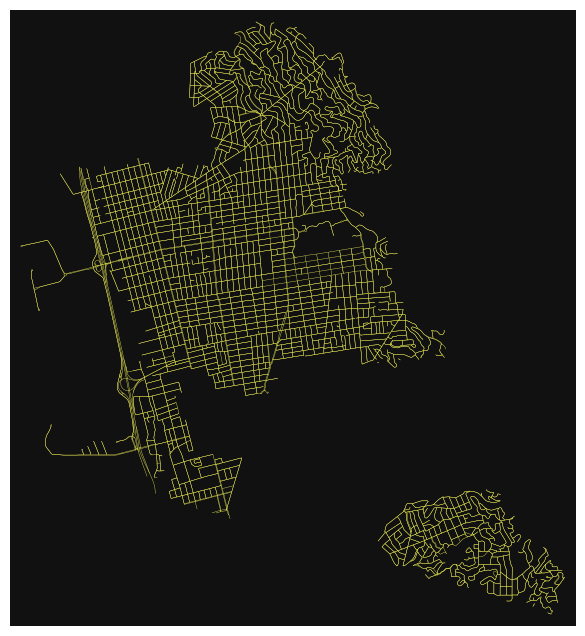

In [14]:
# create a network from multiple places
places = [
    "Piedmont, California, USA",
    {"city": "Berkeley", "state": "California"},
    "Emeryville, California, USA",
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [15]:
# or create a network from structured place queries
places = [
    {"city": "Daly City", "state": "California"},
    {"city": "South San Francisco", "state": "California"},
]
G = ox.graph_from_place(places, network_type="drive")

In [16]:
# get the network for the borough of manhattan
G = ox.graph_from_place("Manhattan, New York, New York, USA", network_type="drive")

In [17]:
# get the network for a neighborhood
place = "SoHo, New York, NY"
G = ox.graph_from_place(place, network_type="drive")

In [18]:
%%time
# get the network for all of LA
# takes a couple minutes to do all the downloading and processing
place = "Los Angeles, California, USA"
G = ox.graph_from_place(place, network_type="drive", simplify=False, retain_all=True)

CPU times: total: 1min 4s
Wall time: 1min 23s


In [19]:
# create a network constrained to the shape of hong kong island
G = ox.graph_from_place("Hong Kong Island", network_type="drive")